# Análisis de Riesgo Crediticio

## Importar bibliotecas

In [55]:
import os

import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import matplotlib.pyplot as plt
import seaborn as sns  

import warnings
warnings.filterwarnings("ignore")

## Leer los datos

In [56]:
raw_data = pd.read_csv(os.path.join('..', 'data', 'input', 'loan.csv'))
raw_df = raw_data.copy(deep=True) # Estos son los datos sobre los cuales se trabajará
raw_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,1.0,NaN,NaN,3.0,0.0,13648.0,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-2015,171.62,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-1999,5.0,NaN,NaN,3.0,0.0,1687.0,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-2013,119.66,NaN,Sep-2013,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,2.0,NaN,NaN,2.0,0.0,2956.0,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-2014,649.91,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-1996,1.0,35.0,NaN,10.0,0.0,5598.0,21.0,37.0,f,0.0,0.0,12226.302212,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-2015,357.48,NaN,Jan-2015,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-2011,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-1996,0.0,38.0,NaN,15.0,0.0,27783.0,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-2016,67.79,Feb-2016,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Análisis Descriptivo y Exploratorio

### Exploración del dataset

In [57]:
raw_df.shape

(887379, 74)

In [58]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 74 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           887379 non-null  int64  
 1   member_id                    887379 non-null  int64  
 2   loan_amnt                    887379 non-null  float64
 3   funded_amnt                  887379 non-null  float64
 4   funded_amnt_inv              887379 non-null  float64
 5   term                         887379 non-null  object 
 6   int_rate                     887379 non-null  float64
 7   installment                  887379 non-null  float64
 8   grade                        887379 non-null  object 
 9   sub_grade                    887379 non-null  object 
 10  emp_title                    835917 non-null  object 
 11  emp_length                   842554 non-null  object 
 12  home_ownership               887379 non-null  object 
 13 

El dataset contiene 887379 filas y 74 variables de las cuales 51 son numéricas y 23 son categóricas.

La variable target es _loan_status_

### Preprocesamiento

In [59]:
null_percentages = raw_df.isnull().mean() * 100

for column, percentage in null_percentages.items():
	if percentage:
		print({column: [round(percentage, 5), raw_df[column].dtype]})

{'emp_title': [5.79933, dtype('O')]}
{'emp_length': [5.05139, dtype('O')]}
{'annual_inc': [0.00045, dtype('float64')]}
{'desc': [85.79795, dtype('O')]}
{'title': [0.01724, dtype('O')]}
{'delinq_2yrs': [0.00327, dtype('float64')]}
{'earliest_cr_line': [0.00327, dtype('O')]}
{'inq_last_6mths': [0.00327, dtype('float64')]}
{'mths_since_last_delinq': [51.19706, dtype('float64')]}
{'mths_since_last_record': [84.5553, dtype('float64')]}
{'open_acc': [0.00327, dtype('float64')]}
{'pub_rec': [0.00327, dtype('float64')]}
{'revol_util': [0.05657, dtype('float64')]}
{'total_acc': [0.00327, dtype('float64')]}
{'last_pymnt_d': [1.99002, dtype('O')]}
{'next_pymnt_d': [28.50766, dtype('O')]}
{'last_credit_pull_d': [0.00597, dtype('O')]}
{'collections_12_mths_ex_med': [0.01634, dtype('float64')]}
{'mths_since_last_major_derog': [75.01597, dtype('float64')]}
{'annual_inc_joint': [99.94241, dtype('float64')]}
{'dti_joint': [99.94264, dtype('float64')]}
{'verification_status_joint': [99.94241, dtype('O')

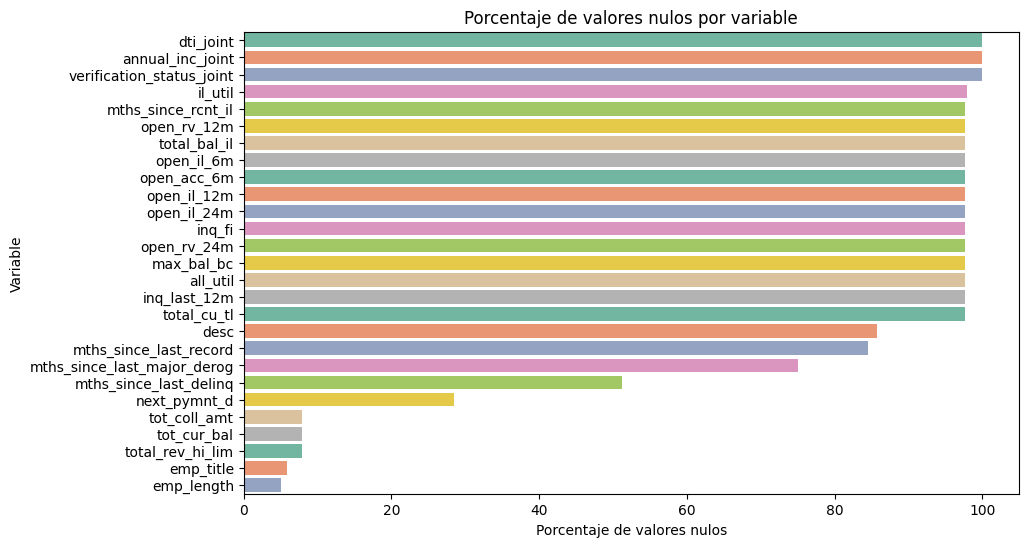

In [60]:
# Filtrar solo las columnas con más del 5% de valores nulos
null_percentages = null_percentages[null_percentages > 5].sort_values(ascending=False)

# Crear un gráfico de barras con Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=null_percentages.values, y=null_percentages.index, palette='Set2')

plt.xlabel('Porcentaje de valores nulos')
plt.ylabel('Variable')
plt.title('Porcentaje de valores nulos por variable')

plt.show()

Podemos evidenciar que hay un gran número de variables con alto porcentaje de valores nulos; estas variables no aportarían mucho en la construcción de un modelo, por lo que se decide eliminarlas.

In [61]:
columns_to_drop = [i for i in null_percentages.index if null_percentages[i] > 20]
raw_df.drop(columns=columns_to_drop, inplace=True)
raw_df.shape

(887379, 52)

In [62]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 52 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   id                          887379 non-null  int64  
 1   member_id                   887379 non-null  int64  
 2   loan_amnt                   887379 non-null  float64
 3   funded_amnt                 887379 non-null  float64
 4   funded_amnt_inv             887379 non-null  float64
 5   term                        887379 non-null  object 
 6   int_rate                    887379 non-null  float64
 7   installment                 887379 non-null  float64
 8   grade                       887379 non-null  object 
 9   sub_grade                   887379 non-null  object 
 10  emp_title                   835917 non-null  object 
 11  emp_length                  842554 non-null  object 
 12  home_ownership              887379 non-null  object 
 13  annual_inc    

De esta manera, se eliminaron las variables cuyo porcentaje de valores nulos fuera mayor al 20%, quedándonos así con 52 variables, 32 numéricas y 20 categóricas.

Exploremos ahora un poco las variables categóricas.

In [63]:
for column in raw_df.columns:
    if raw_df[column].dtype == 'object':
        print(f'{column}: {len(raw_df[column].unique())}: {raw_df[column].unique()}')

term: 2: [' 36 months' ' 60 months']
grade: 7: ['B' 'C' 'A' 'E' 'F' 'D' 'G']
sub_grade: 35: ['B2' 'C4' 'C5' 'C1' 'B5' 'A4' 'E1' 'F2' 'C3' 'B1' 'D1' 'A1' 'B3' 'B4'
 'C2' 'D2' 'A3' 'A5' 'D5' 'A2' 'E4' 'D3' 'D4' 'F3' 'E3' 'F4' 'F1' 'E5'
 'G4' 'E2' 'G3' 'G2' 'G1' 'F5' 'G5']
emp_title: 299272: [nan 'Ryder' 'AIR RESOURCES BOARD' ... 'machining Cell Lead'
 'KYC Business Analyst' 'Manager Hotel Operations Oasis ']
emp_length: 12: ['10+ years' '< 1 year' '1 year' '3 years' '8 years' '9 years' '4 years'
 '5 years' '6 years' '2 years' '7 years' nan]
home_ownership: 6: ['RENT' 'OWN' 'MORTGAGE' 'OTHER' 'NONE' 'ANY']
verification_status: 3: ['Verified' 'Source Verified' 'Not Verified']
issue_d: 103: ['Dec-2011' 'Nov-2011' 'Oct-2011' 'Sep-2011' 'Aug-2011' 'Jul-2011'
 'Jun-2011' 'May-2011' 'Apr-2011' 'Mar-2011' 'Feb-2011' 'Jan-2011'
 'Dec-2010' 'Nov-2010' 'Oct-2010' 'Sep-2010' 'Aug-2010' 'Jul-2010'
 'Jun-2010' 'May-2010' 'Apr-2010' 'Mar-2010' 'Feb-2010' 'Jan-2010'
 'Dec-2009' 'Nov-2009' 'Oct-2009' 'Se

* term: se refiere al número de cuotas del préstamo.
* grade y subgrade: Calificación del préstamo. Subgrade da más información pero contiene muchos más niveles.
* emp_tittle: Trabajo de la persona que solicitó el préstamo; contiene demasiados niveles como para poder trabajar con ella.
* emp_lenght: Cuánto tiempo lleva la persona en su empleo.
* home_ownership: en qué tipo de casa vive
* issue_d: Fecha en la que se financió el préstamo; hay que cambiarle el tipo.
* loan_status: variable objetivo.
* payment_plan: indica si se ha implementado un plan de pago
* url: no aporta información
* purpose: motivo del préstamo
* title: título del préstamo
* zip_code: primeros 3 dígitos del código ZIP
* addr_state: Estado donde vive la persona
* earliest_cr_line: fecha en la que se abrió el primer credito; hay que cambiarle el tipo
* initial_list_status: estado inicial de la cotización del préstamo
* last_pymnt_d: fecha en la que se recibió el último pago; hay que cambiarle el tipo
* application_type: tipo de solicitud, si invidual o conjunta

In [64]:
colums_to_drop = ['id', 'member_id', 'url', 'title', 'addr_state', 'emp_title', 'verification_status', 'sub_grade', 'policy_code']
raw_df.drop(columns=colums_to_drop, inplace=True)

Cambiemos el tipo de datos de las variables de fechas.

In [65]:
raw_df['issue_d'] = pd.to_datetime(raw_df['issue_d'])
raw_df['earliest_cr_line'] = pd.to_datetime(raw_df['earliest_cr_line'])
raw_df['last_pymnt_d'] = pd.to_datetime(raw_df['last_pymnt_d'])
raw_df['last_credit_pull_d'] = pd.to_datetime(raw_df['last_credit_pull_d'])

Modificamos la variable zip_code para que sea numérica.

In [66]:
raw_df['zip_code'] = raw_df['zip_code'].str.replace('xx', '').astype(int)

In [67]:
raw_df.shape

(887379, 43)

In [68]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 43 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   loan_amnt                   887379 non-null  float64       
 1   funded_amnt                 887379 non-null  float64       
 2   funded_amnt_inv             887379 non-null  float64       
 3   term                        887379 non-null  object        
 4   int_rate                    887379 non-null  float64       
 5   installment                 887379 non-null  float64       
 6   grade                       887379 non-null  object        
 7   emp_length                  842554 non-null  object        
 8   home_ownership              887379 non-null  object        
 9   annual_inc                  887375 non-null  float64       
 10  issue_d                     887379 non-null  datetime64[ns]
 11  loan_status                 887379 non-

Ahora, contamos con 43 variables: 30 numéricas, 10 categóricas y 3 temporales

### Visualizaciones

#### Variables Categóricas

Comencemos visualizando la distribución de las variables categóricas.

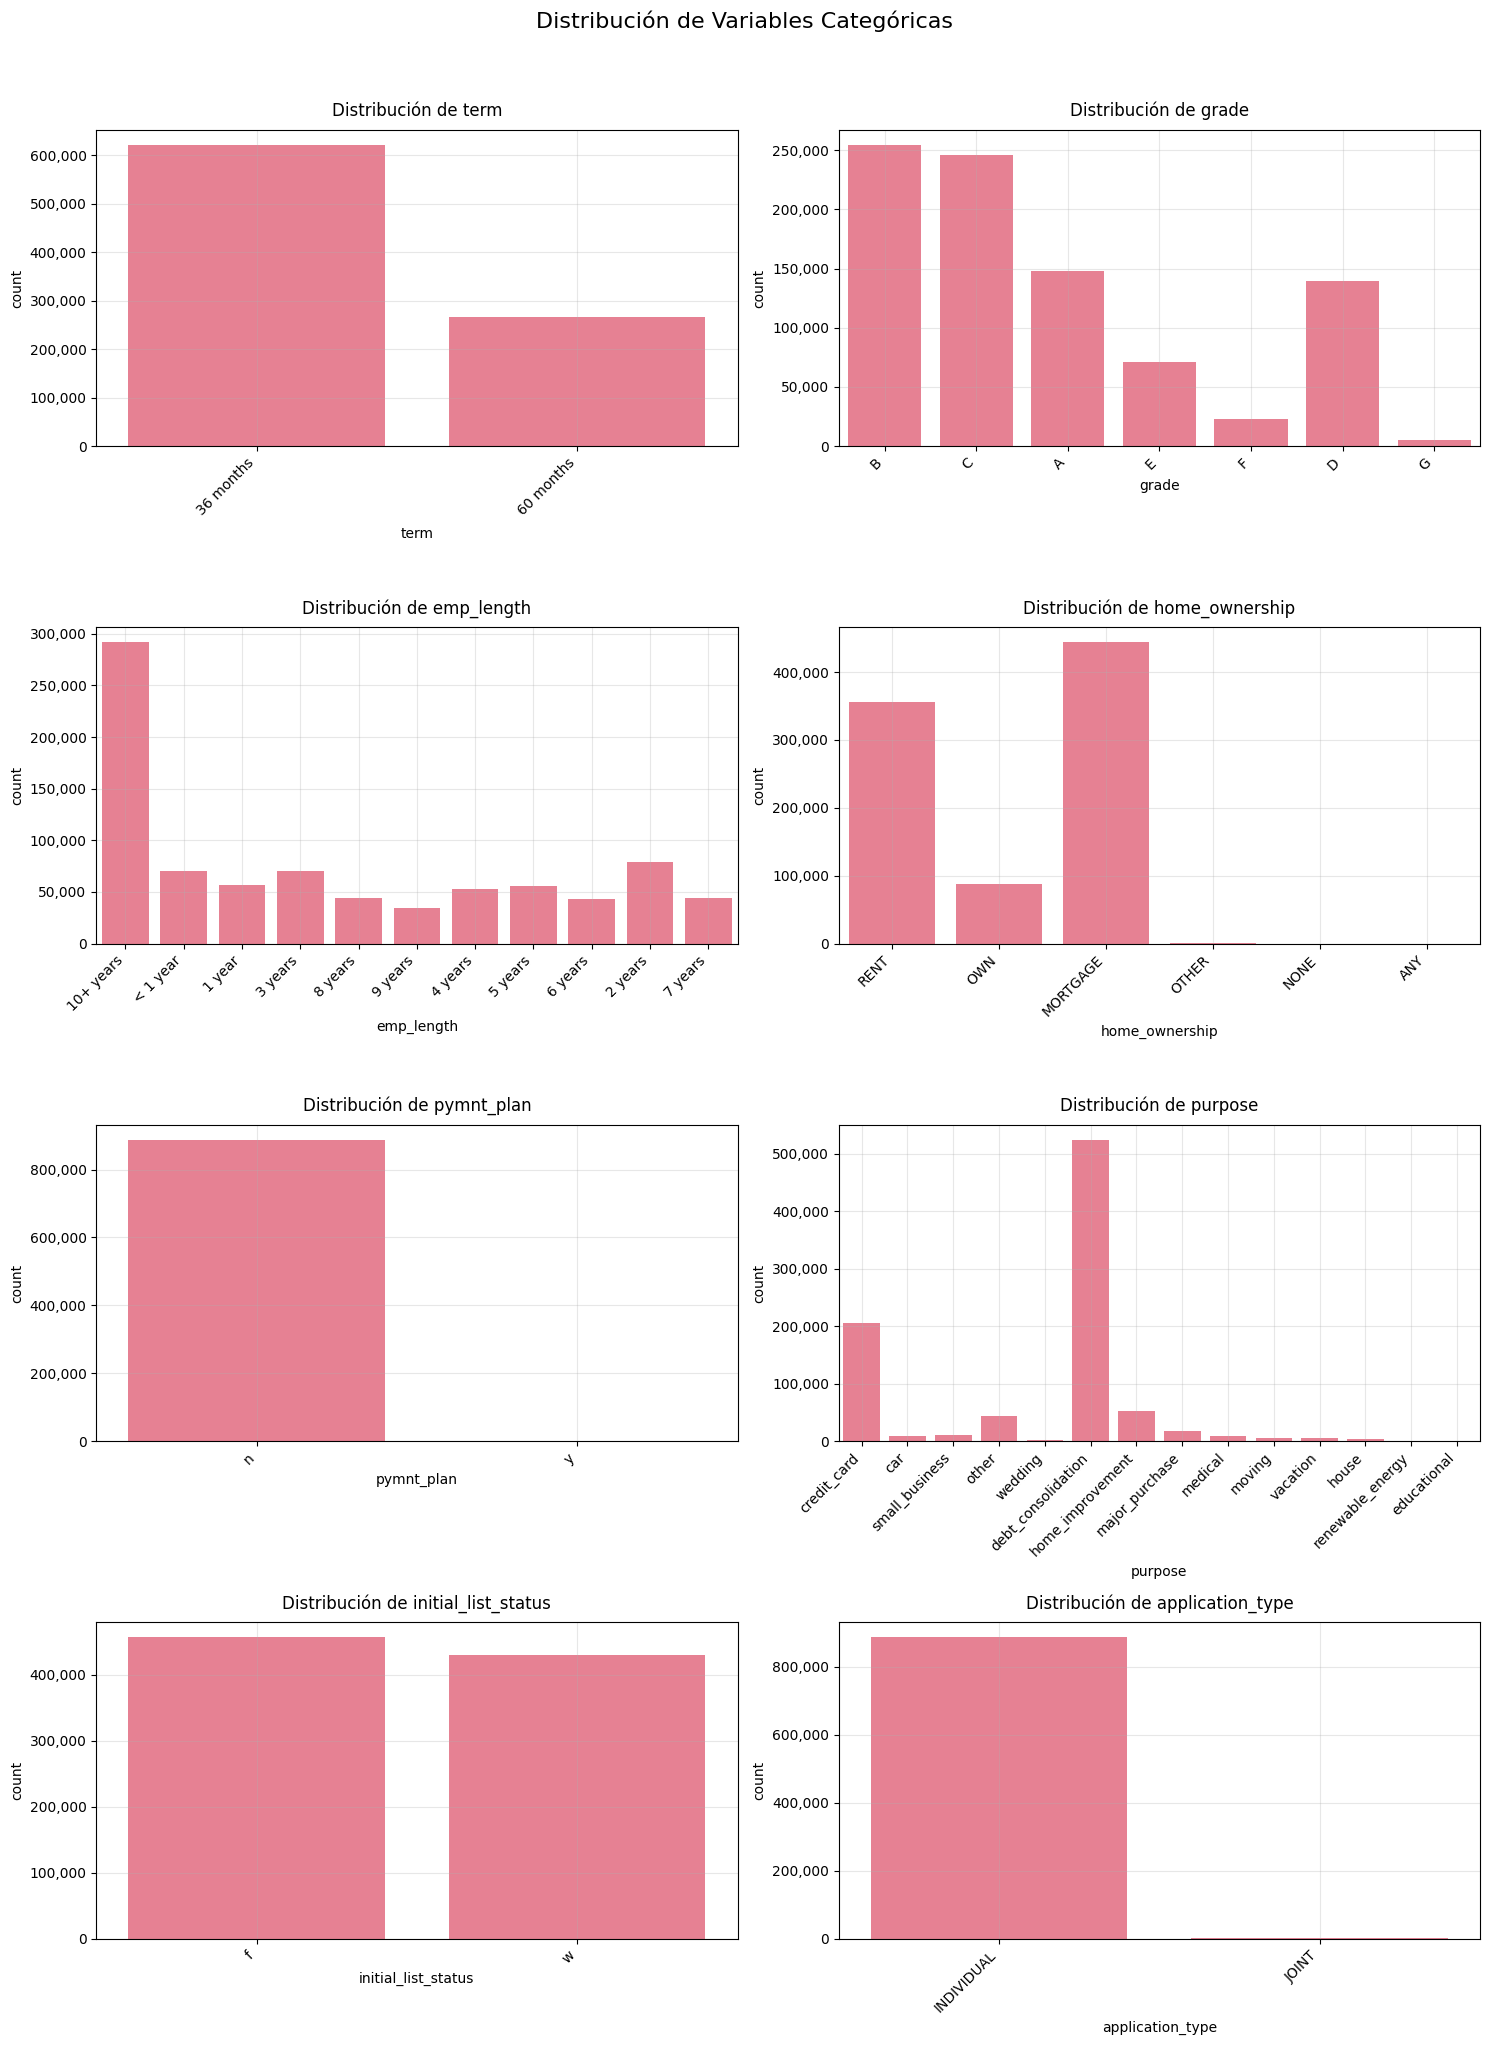

In [69]:
# Configuración del estilo
sns.set_palette("husl")

# Obtener columnas categóricas excluyendo loan_status
cat_columns = [col for col in raw_df.select_dtypes(include='object').columns 
            	if col != 'loan_status']

# Crear subplots
fig, axes = plt.subplots(4, 2, figsize=(15, 20))
fig.suptitle('Distribución de Variables Categóricas', fontsize=16, y=1.02)

# Iterar sobre las columnas
for i, column in enumerate(cat_columns):
    ax = axes[i // 2, i % 2]
    
    # Crear countplot
    sns.countplot(data=raw_df, x=column, ax=ax)
    
    # Personalizar cada subplot
    ax.set_title(f'Distribución de {column}', pad=10)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    ax.grid(True, alpha=0.3)
    
    # Formatear etiquetas del eje y
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))

# Ajustar layout
plt.tight_layout()
plt.show()

Podemos observar que las variables de application_type pymnt_plan están extremadamente desequilibrada, por lo que podría ser mejorar eliminarlas.

Antes de eso, convirtamos nuestra variable target en una variable binaria:

In [70]:
def binarize_target(loan_status):
    cat_0_words = ["paid", "current"]
    cat_1_words = ["charged off", "late", "default", "grace period"]
    for word in cat_0_words:
        if loan_status.lower().find(word)!=-1: return 0
    for word in cat_1_words:
        if loan_status.lower().find(word)!=-1: return 1
    return -1

raw_df["target"] = raw_df["loan_status"].apply(binarize_target)
raw_df = raw_df[raw_df["target"]!=-1]

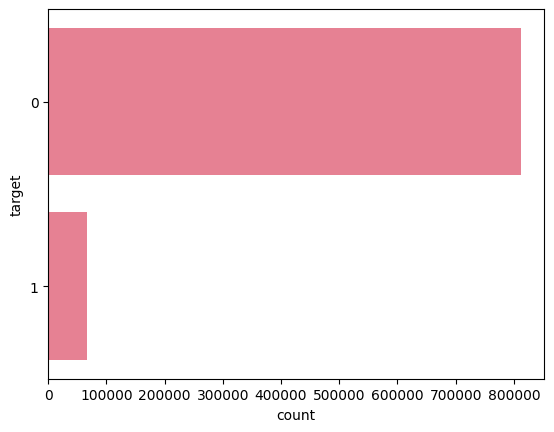

In [71]:
sns.countplot(data=raw_df, y="target")
plt.show()

* 0: fully paid, current. Los que no incumplen el pago.
* 1: charged off, late, default, grace period. Los que sí incumplen el pago.

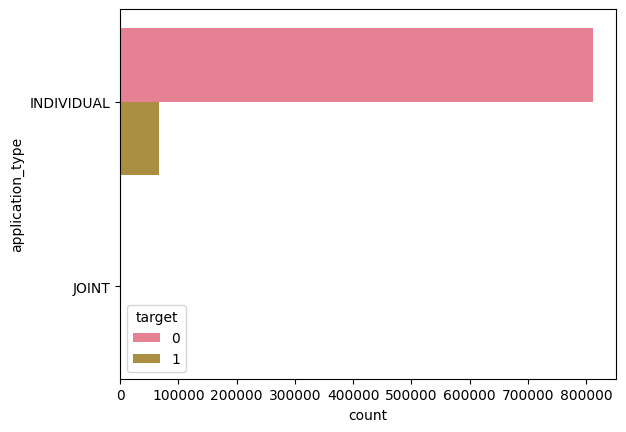

In [72]:
sns.countplot(data=raw_df, y="application_type", hue="target")
plt.show()

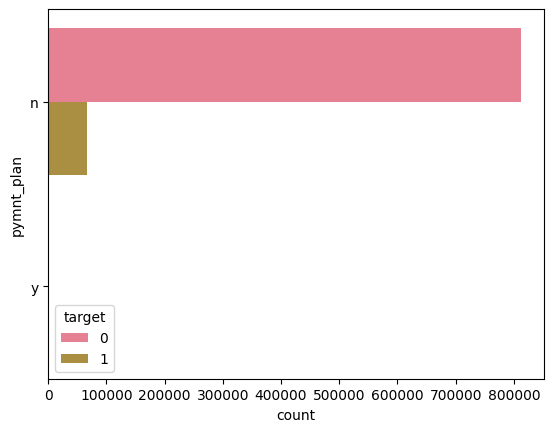

In [73]:
sns.countplot(data=raw_df, y="pymnt_plan", hue="target")
plt.show()

Vemos que application_type y pymnt_plan no aportan mucha información, así que las eliminaremos.

In [74]:
raw_df = raw_df.drop(columns=["pymnt_plan", "application_type"])

Observemos cómo se distribuyen las variables categóricas si las segmentamos por nuestra variable target.

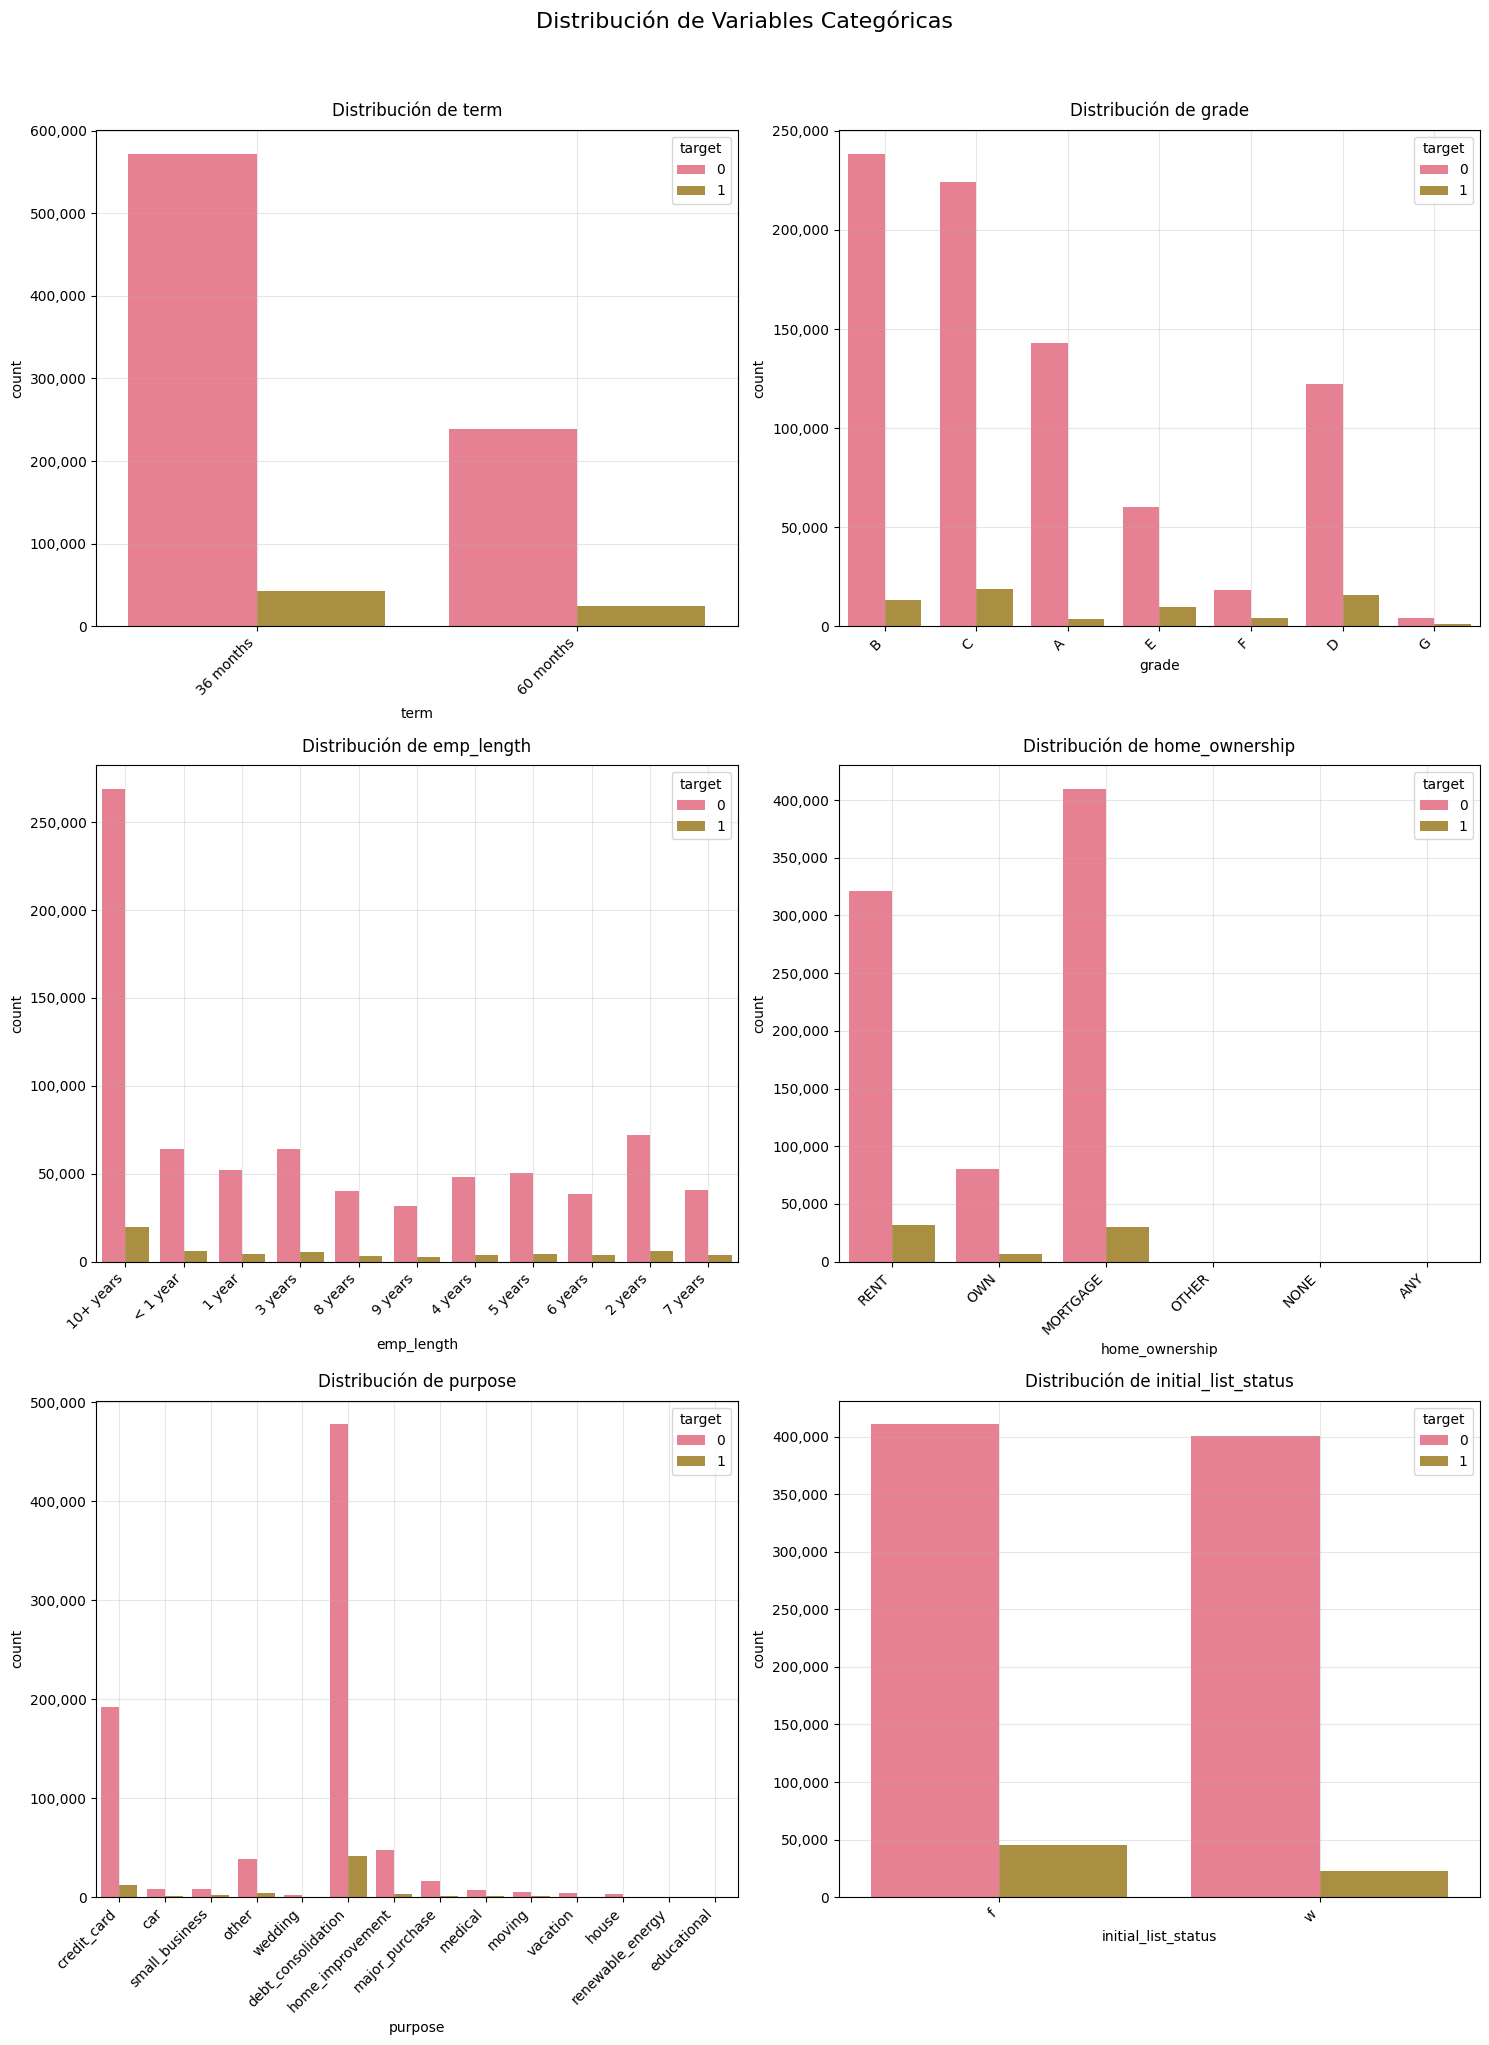

In [75]:
# Obtener columnas categóricas excluyendo loan_status y target
cat_columns = [col for col in raw_df.select_dtypes(include='object').columns 
            	if col != 'loan_status' and col != 'target']

# Crear subplots
fig, axes = plt.subplots(3, 2, figsize=(15, 20))
fig.suptitle('Distribución de Variables Categóricas', fontsize=16, y=1.02)

# Iterar sobre las columnas
for i, column in enumerate(cat_columns):
    ax = axes[i // 2, i % 2]
    
    # Crear countplot
    sns.countplot(data=raw_df, x=column, hue='target', ax=ax)
    
    # Personalizar cada subplot
    ax.set_title(f'Distribución de {column}', pad=10)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    ax.grid(True, alpha=0.3)
    
    # Formatear etiquetas del eje y
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))

# Ajustar layout
plt.tight_layout()
plt.show()

Podemos sacar conclusiones interesantes sobre las personas que incumplen los pagos:
* term: mayor porcentaje en 36 meses.
* grade: mayor cantidad en D, C, B y E.
* emp_lenth: mayor proporción en 10+ años
* home_ownership: viven en casas rentadas o con hipoteca
* purpose: el principal motivo del préstamo es la consolidación de débito y la tarjeta de crédito
* initial_status: mayor proporción en estado _f_

#### Variables numéricas

Pasemos ahora a las variables numéricas

In [76]:
numerical_columns = raw_df.select_dtypes(include=['float']).columns
numerical_columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate',
       'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_amnt',
       'collections_12_mths_ex_med', 'acc_now_delinq', 'tot_coll_amt',
       'tot_cur_bal', 'total_rev_hi_lim'],
      dtype='object')

* loan_amnt: cantidad del préstamo
* funded_amnt: cantidad comprometida al préstamo
* funded_amnt_inv: cantidad comprometida por los inversionistas para el préstamo
* int_rate: tasa de interés
* installment: El pago mensual adeudado por el prestatario si se origina el préstamo
* annual_inc: ingresos anuales del prestatario
* dti: Un índice calculado utilizando los pagos mensuales totales de la deuda del prestatario sobre las obligaciones totales de la deuda, excluyendo la hipoteca y el préstamo LC solicitado, dividido por los ingresos mensuales declarados por el prestatario.
* delinq_2yrs: El número de incidencias de morosidad de más de 30 días en el archivo de crédito del prestatario durante los últimos 2 años.
* inq_last_6mths: El número de consultas en los últimos 6 meses (excluyendo consultas sobre automóviles e hipotecas)
* open_acc: El número de líneas de crédito abiertas en el expediente de crédito del prestatario.
* pub_rec: Número de registros públicos despectivos
* revol_bal: Saldo rotativo total del crédito
* revol_util: Tasa de utilización de la línea renovable, o la cantidad de crédito que utiliza el prestatario en relación con todo el crédito renovable disponible.
* total_acc: El número total de líneas de crédito actualmente en el archivo de crédito del prestatario.
* out_prncp: Principal pendiente restante para el monto total financiado
* out_prncp_inv: Principal pendiente restante por parte del monto total financiado por inversionistas
* total_pymnt: Pagos recibidos hasta la fecha por el monto total financiado
* total_pymnt_inv: Pagos recibidos hasta la fecha por parte del monto total financiado por inversores
* total_rec_prncp: Principal recibido hasta la fecha
* total_rec_int: Interes recibido hasta la fecha
* total_rec_late_fee: Cargos por pagos atrasados ​​recibidos hasta la fecha
* recoveries: cargo posterior a la recuperación bruta
* collection_recovery_fee: cargo posterior a la tarifa de cobro
* last_pymnt_amnt: Último importe total del pago recibido
* collections_12_mths_ex_med: Número de cobros en 12 meses excluyendo cobros médicos
* acc_now_delinq: El número de cuentas en las que el prestatario está actualmente en mora.
* tot_coll_amt: Montos totales de cobranza adeudados
* tot_cur_bal: Saldo actual total de todas las cuentas
* total_rev_hi_lim: Crédito alto rotativo total/límite de crédito

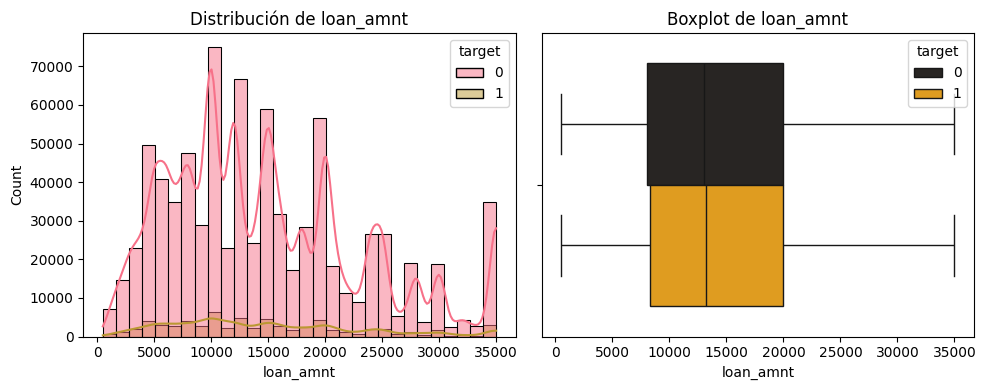

loan_amnt tiene 0 outliers.


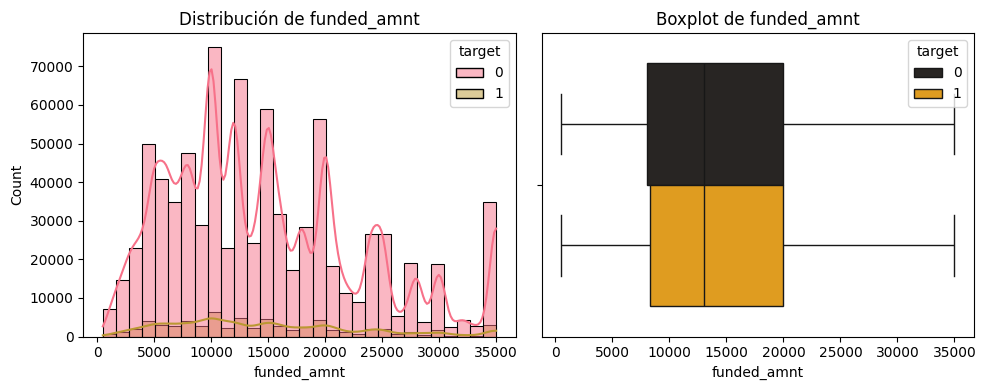

funded_amnt tiene 0 outliers.


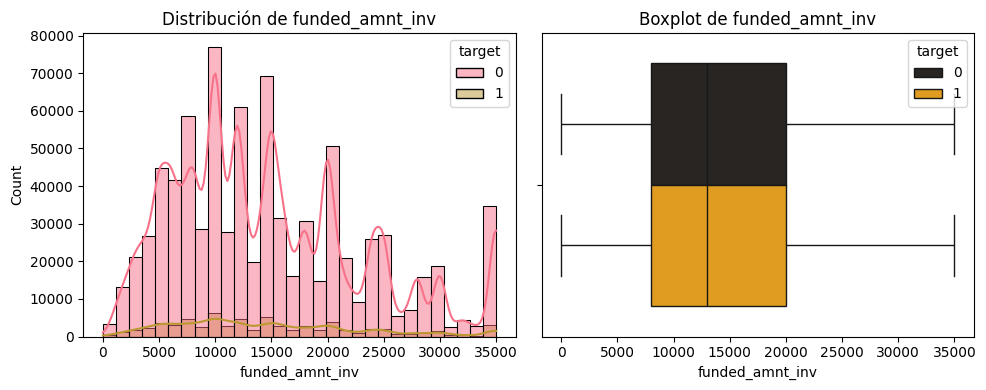

funded_amnt_inv tiene 0 outliers.


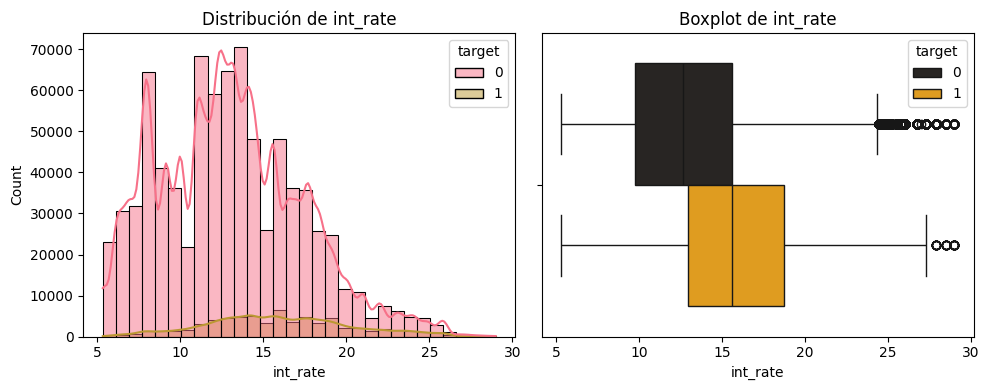

int_rate tiene 6250 outliers.


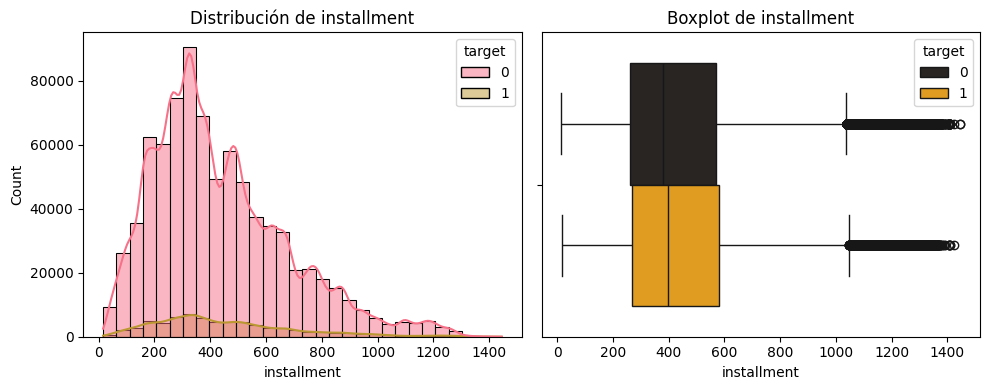

installment tiene 23022 outliers.


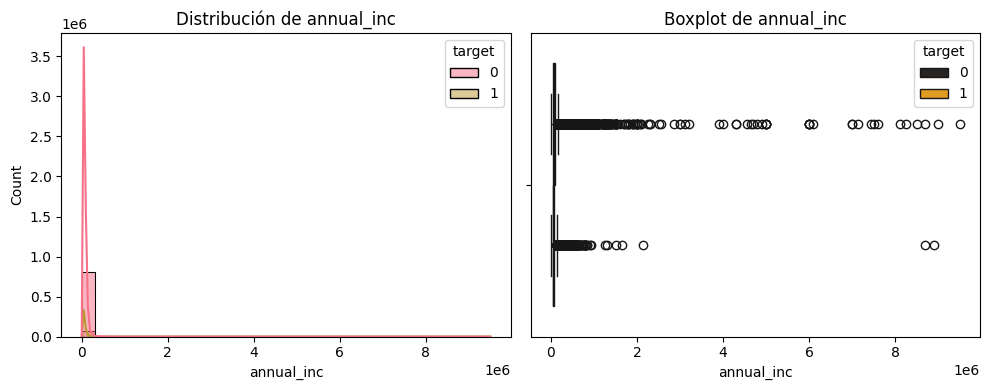

annual_inc tiene 39276 outliers.


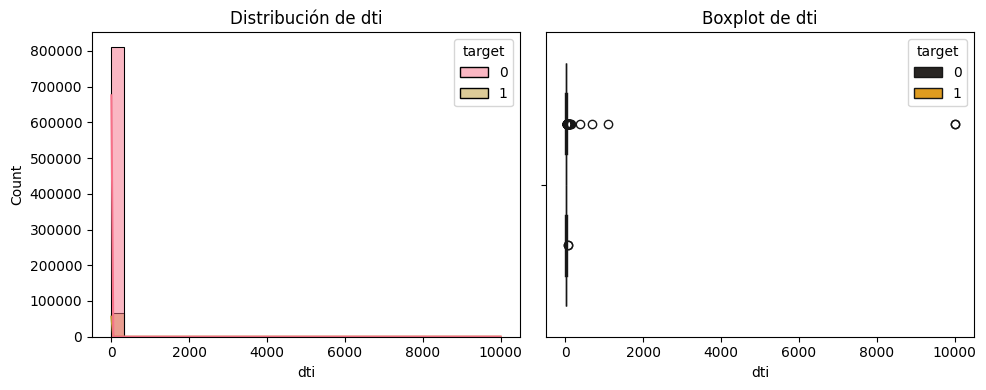

dti tiene 70 outliers.


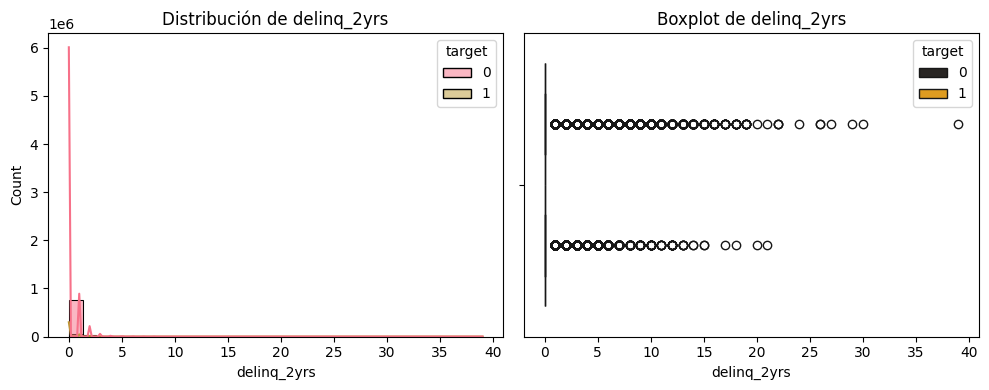

delinq_2yrs tiene 168586 outliers.


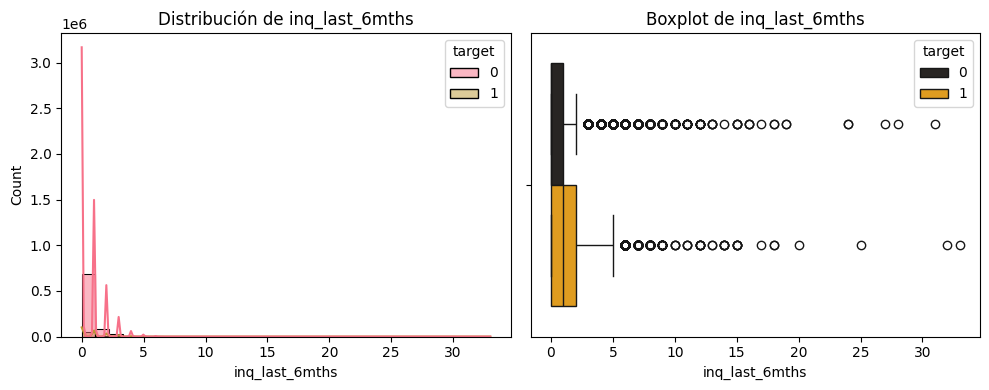

inq_last_6mths tiene 53434 outliers.


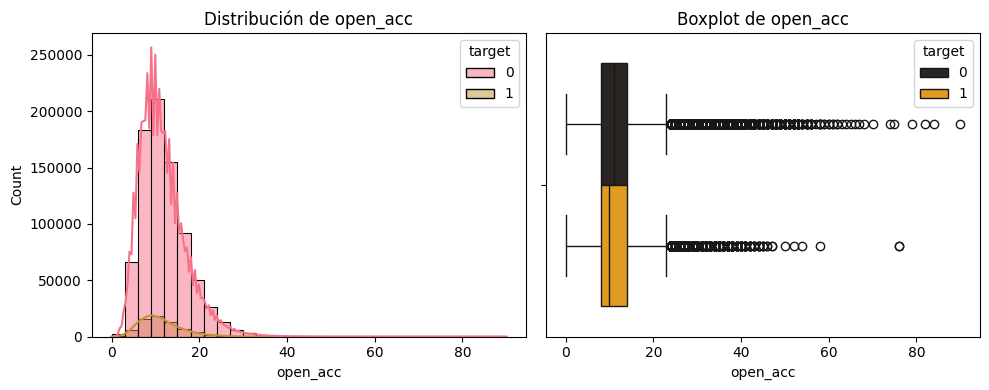

open_acc tiene 27080 outliers.


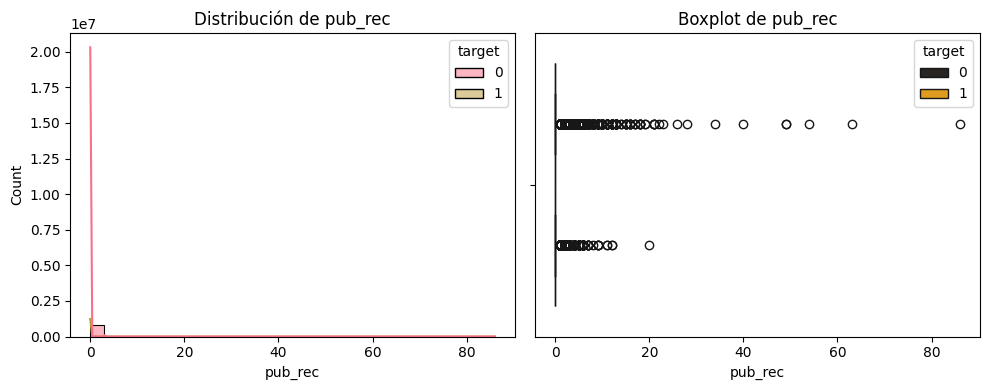

pub_rec tiene 134182 outliers.


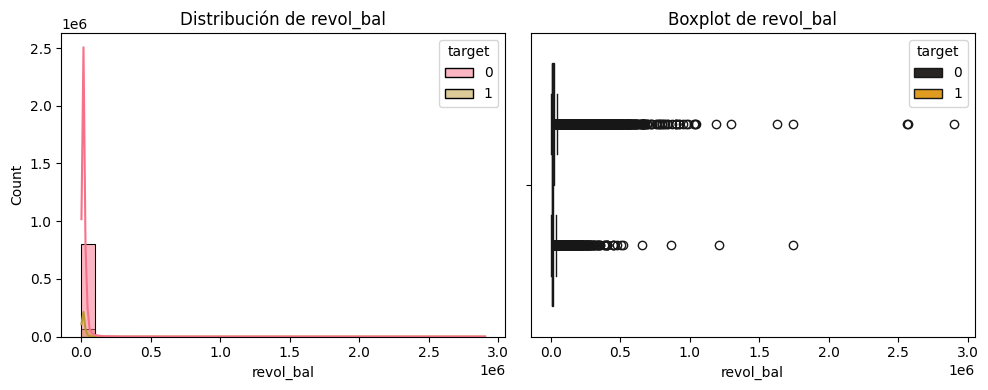

revol_bal tiene 48130 outliers.


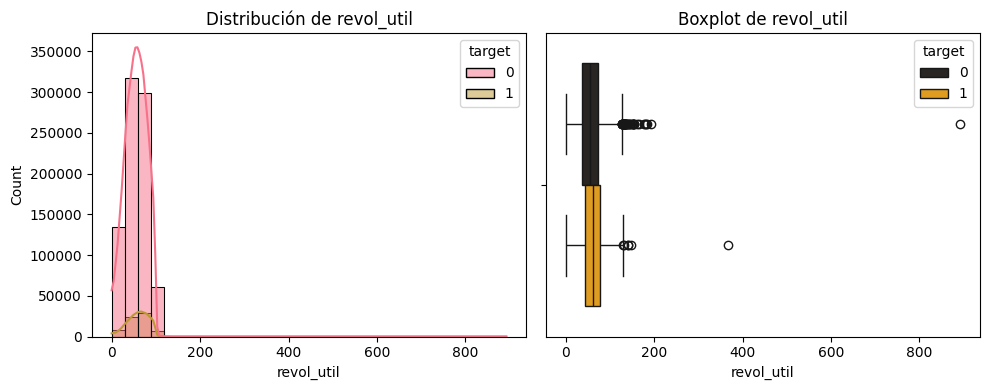

revol_util tiene 51 outliers.


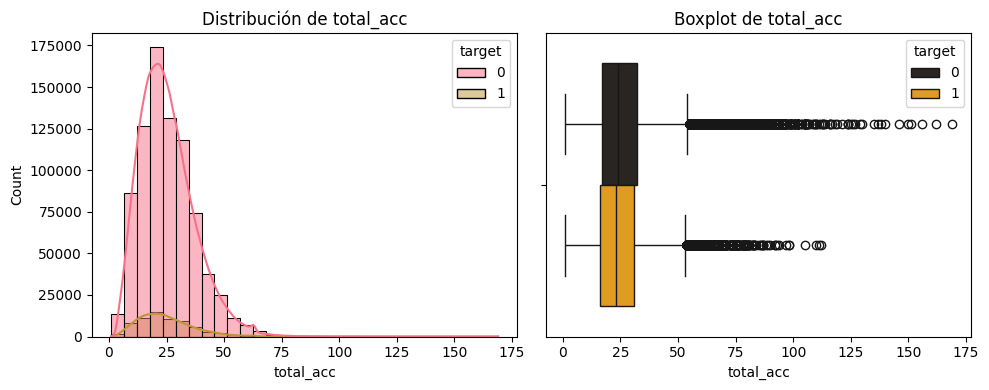

total_acc tiene 17996 outliers.


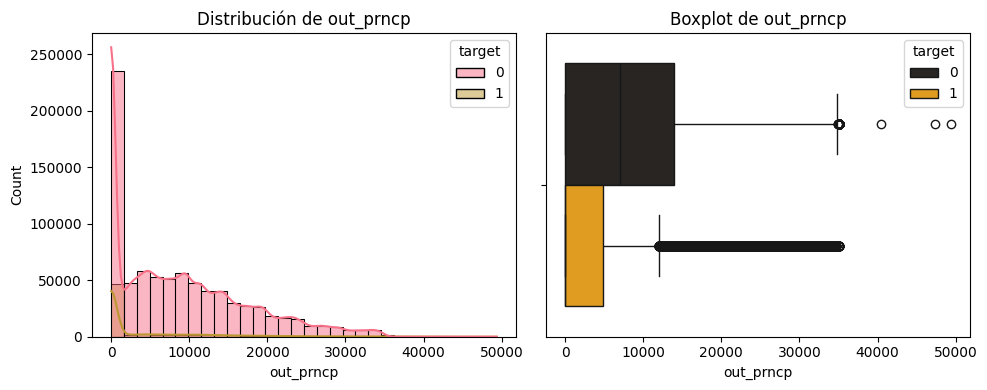

out_prncp tiene 3445 outliers.


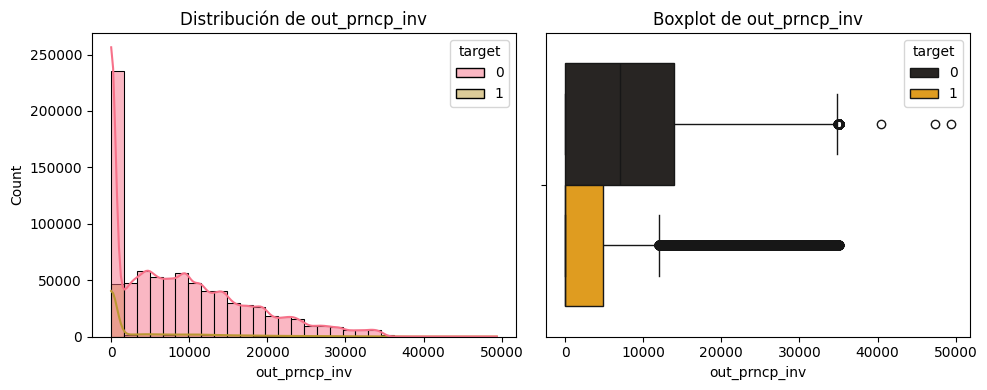

out_prncp_inv tiene 3430 outliers.


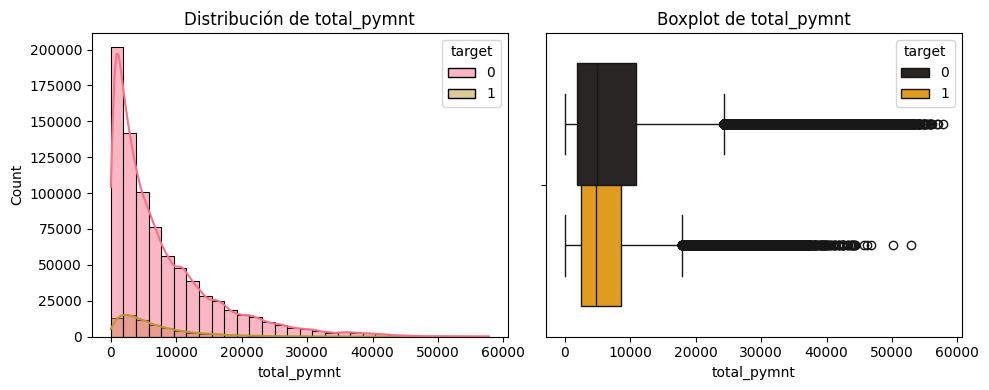

total_pymnt tiene 45698 outliers.


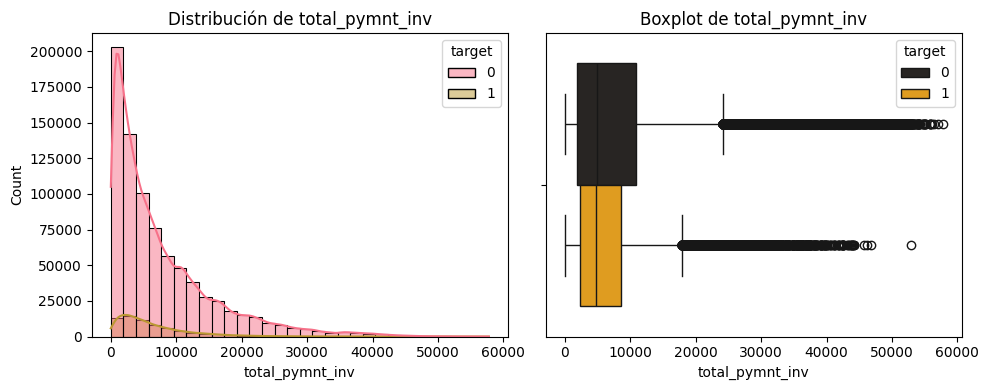

total_pymnt_inv tiene 45869 outliers.


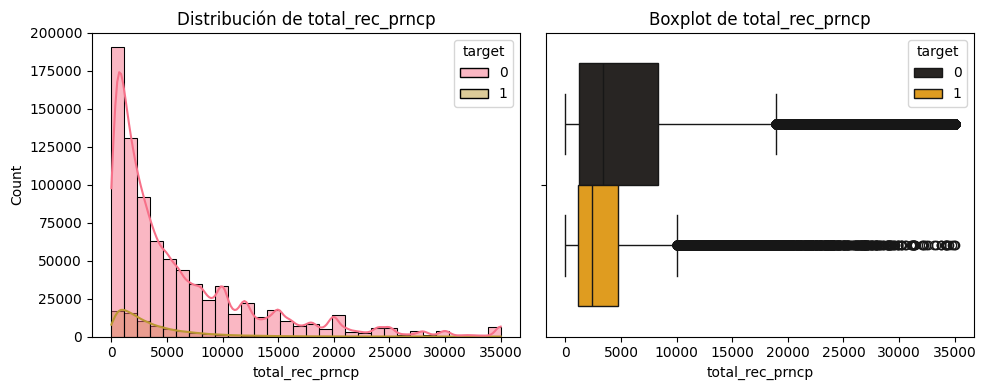

total_rec_prncp tiene 57137 outliers.


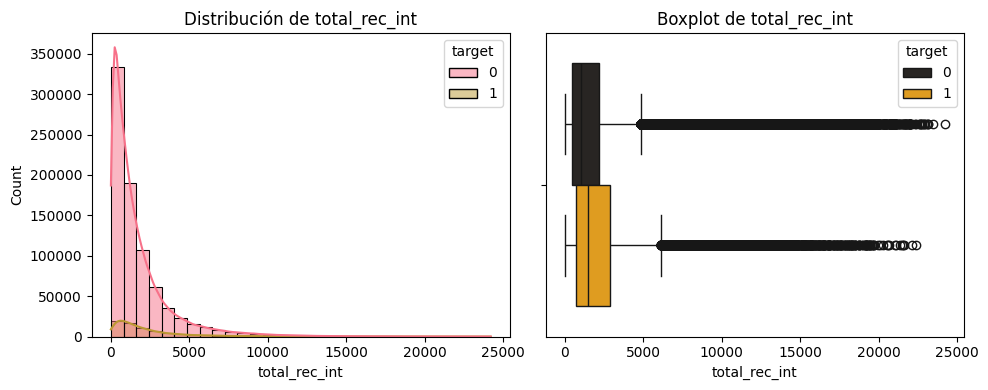

total_rec_int tiene 63382 outliers.


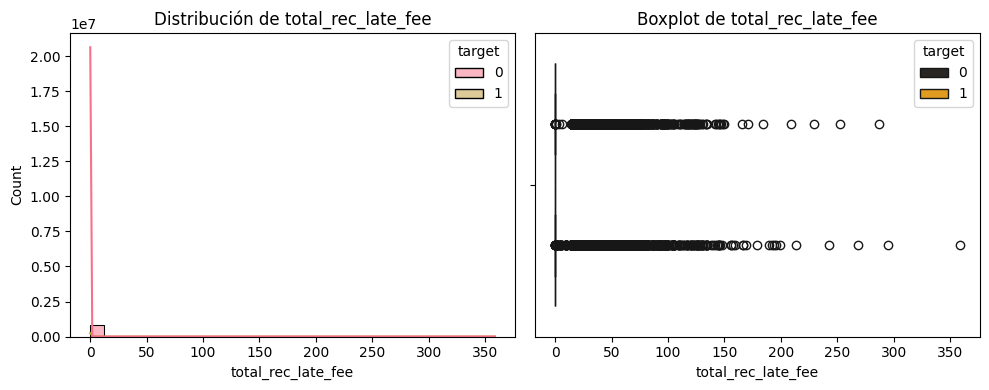

total_rec_late_fee tiene 12517 outliers.


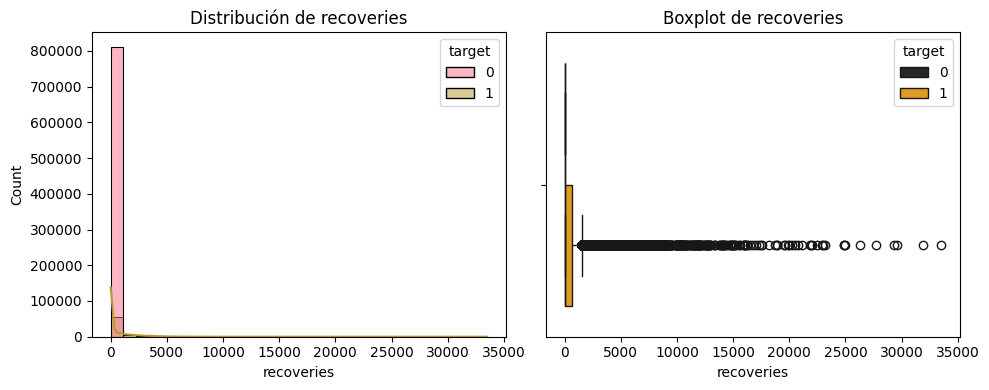

recoveries tiene 24677 outliers.


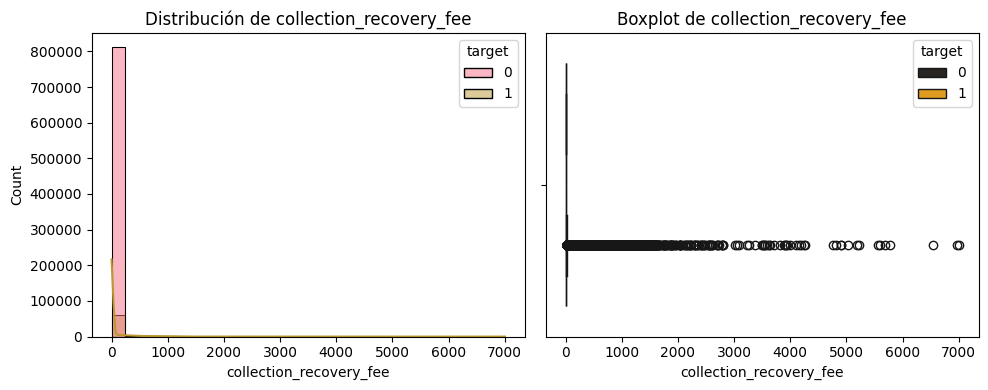

collection_recovery_fee tiene 23507 outliers.


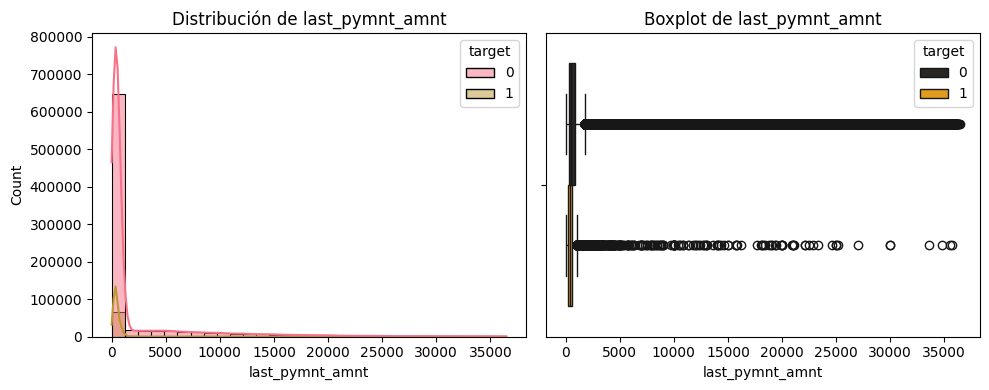

last_pymnt_amnt tiene 156418 outliers.


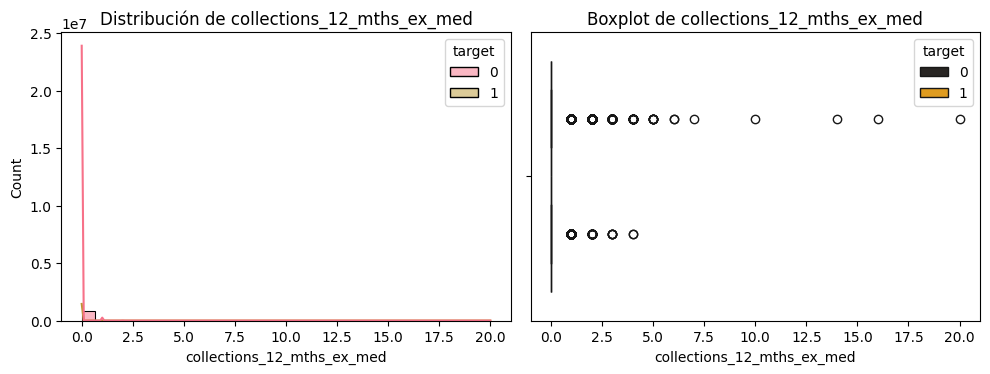

collections_12_mths_ex_med tiene 11486 outliers.


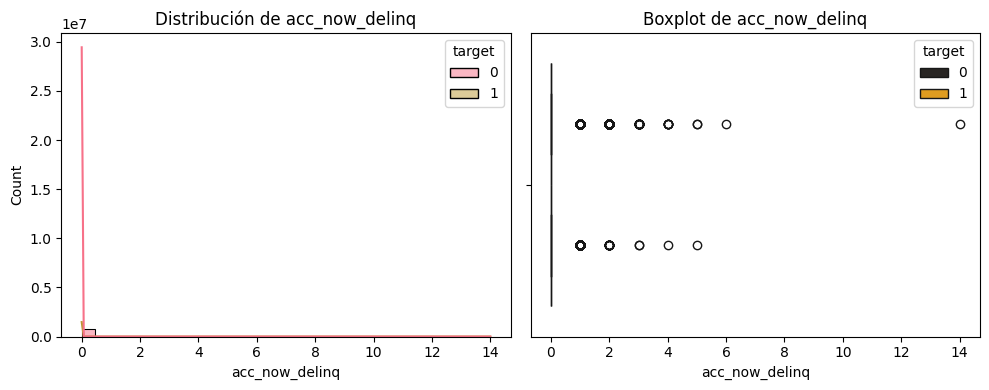

acc_now_delinq tiene 4076 outliers.


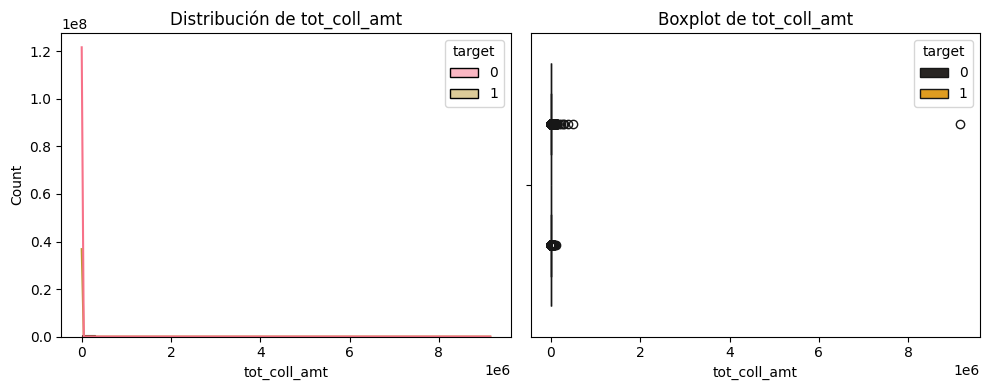

tot_coll_amt tiene 114742 outliers.


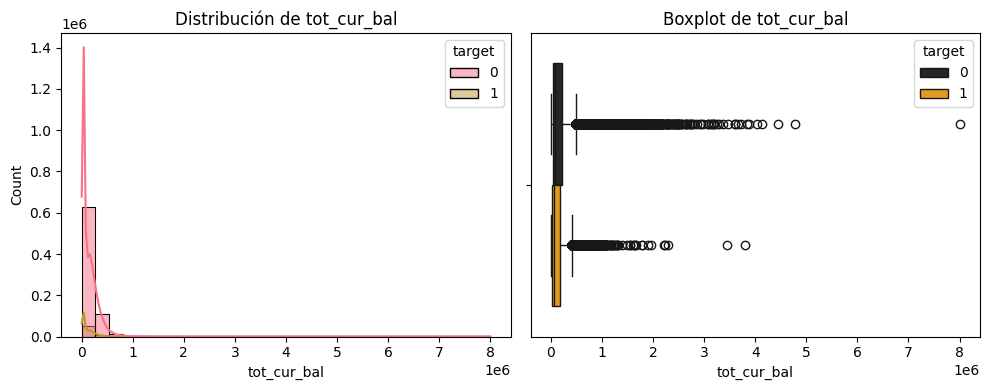

tot_cur_bal tiene 27275 outliers.


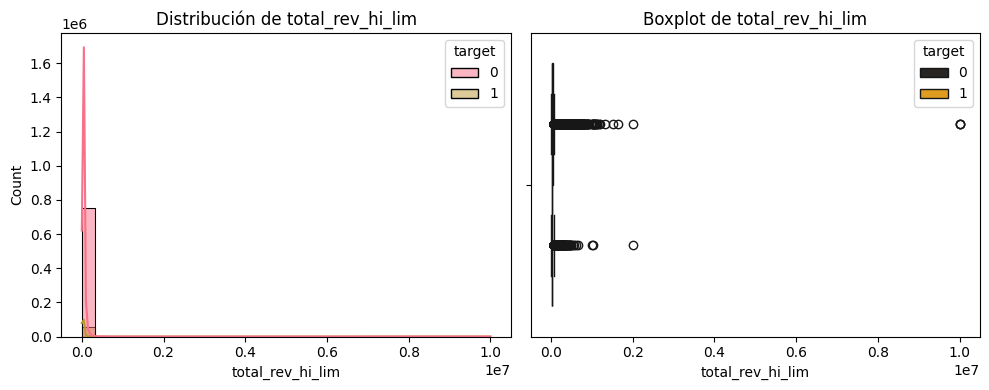

total_rev_hi_lim tiene 46360 outliers.


In [77]:
for col in numerical_columns:
	plt.figure(figsize=(10, 4))
	plt.subplot(1, 2, 1)
	sns.histplot(data=raw_df, x=raw_df[col].dropna(), kde=True, bins=30, color='blue', hue='target')
	plt.title(f'Distribución de {col}')
	plt.subplot(1, 2, 2)
	sns.boxplot(data=raw_df, x=raw_df[col], color='orange', hue='target')
	plt.title(f'Boxplot de {col}')
	plt.tight_layout()
	plt.show()

	# Detect Outliers using IQR
	Q1 = raw_df[col].quantile(0.25)
	Q3 = raw_df[col].quantile(0.75)
	IQR = Q3 - Q1
	outliers = raw_df[(raw_df[col] < Q1 - 1.5 * IQR) | (raw_df[col] > Q3 + 1.5 * IQR)]
	print(f"{col} tiene {len(outliers)} outliers.")

De los gráficos, centrándonos en las personas que incumplen los pagos (target=1), observamos los siguientes:
* Tienen una mediana más alta en la tasa de interés.
* Tienen una mediana más alta en el número de consultas en los últimos 6 meses.
* Tienen una mediana menor en el número de líneas de crédito abiertas en su archivo de crédito.
* Tienen una mediana ligeramente menor en el total de número de líneas de crédito actuales en su archivo de crédito.
* Tienen una mediana menor en el principal pendiente restante para el monto total financiado y también para el monto total financiado por inversionistas.
* Tienen una mediana ligeramente menor en el principal recibido hasta la fecha y en el interés recibido hasta la fecha.
  

### Correlaciones y codependencias

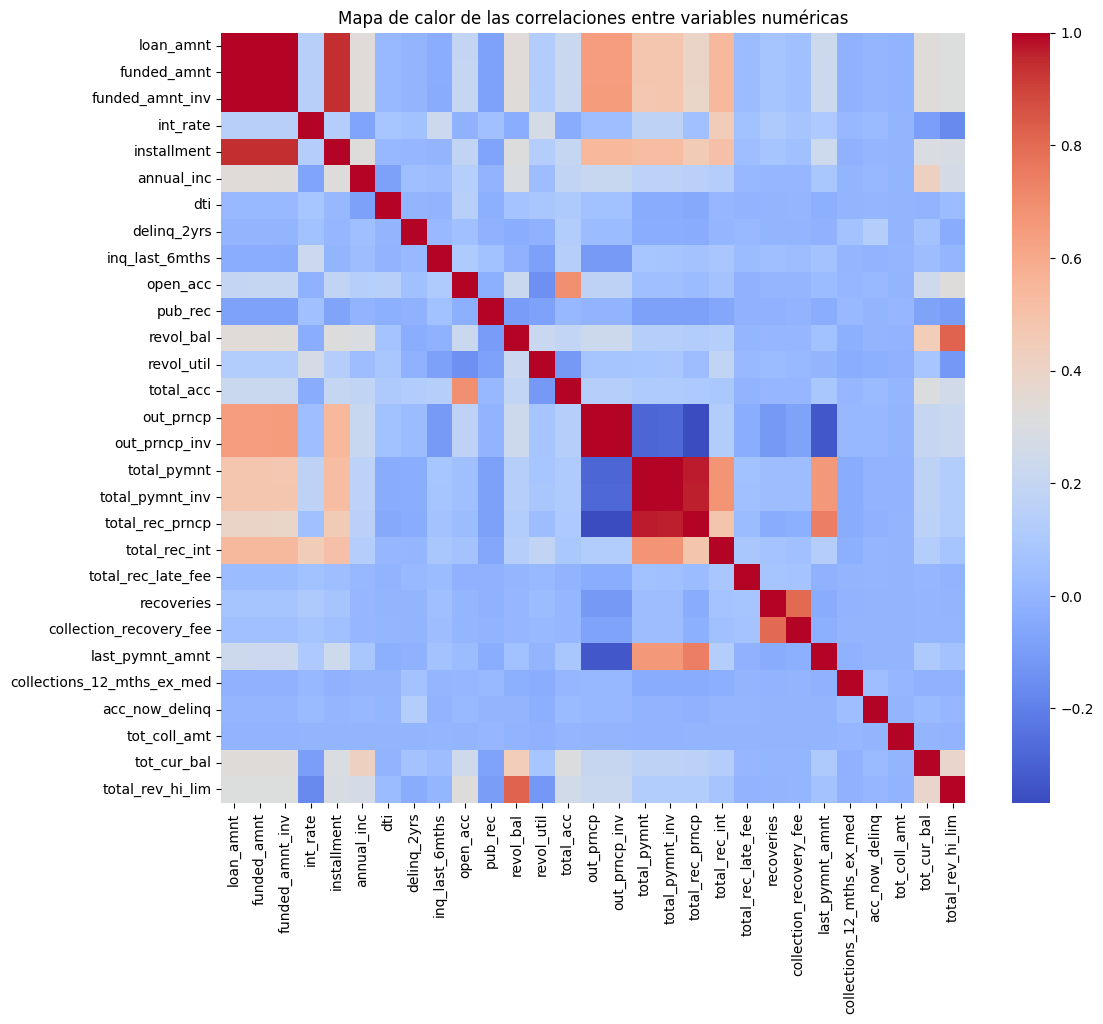

In [78]:
# Correlaciones de variables numéricas
plt.figure(figsize=(12, 10))
correlation_matrix = raw_df[numerical_columns].corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt='.2f')
plt.title('Mapa de calor de las correlaciones entre variables numéricas')
plt.show()

Podemos evidenciar una alta correlación lineal positiva entre:
* Cantidad del préstamo y cantidad comprometida al préstamo.
* Cantidad del préstamo y cantidad comprometida por los inversionistas al préstamo.
* El pago mensual adeudado por el prestatario y la cantidad del préstamo, cantidad comprometida al préstamo y cantidad comprometida por los inversionistas al préstamo.
* Pagos recibidos hasta la fecha por el monto total financiado y estos mismos pagos por el monto total financiado por inversiores.
* Interés recibido hasta la fecha y los pagos recibidos hasta la fecha por el monto total financiado y estos mismos pagos por el monto total financiado por inversiores.
* Crédito alto rotativo total/límite de crédito y saldo rotativo total del crédito
* Último importe total del pago recibido y principal recibido hasta la fecha

También podemos evidenciar una alta correlación lineal negativa entre:
* Principal recibido hasta la fecha y principal pendiente restante para el monto total financiado y el monto total financiado por inversores.
* Último importe total del pago recibido y principal pendiente restante para el monto total financiado y el monto total financiado por inversores.

In [79]:
from sklearn.feature_selection import mutual_info_classif
X = raw_df[numerical_columns].fillna(0)
y = raw_df['target']
mi_scores = mutual_info_classif(X, y, discrete_features=False)
mi_scores = pd.Series(mi_scores, index=numerical_columns).sort_values(ascending=False)
print("Mutual Information Scores:")
print(mi_scores)

Mutual Information Scores:
recoveries                    0.077676
collection_recovery_fee       0.073470
total_rec_prncp               0.044675
last_pymnt_amnt               0.039732
out_prncp_inv                 0.031740
out_prncp                     0.031698
int_rate                      0.028293
inq_last_6mths                0.027281
total_pymnt                   0.017481
installment                   0.017074
total_pymnt_inv               0.016124
total_rec_int                 0.012159
open_acc                      0.009627
total_rec_late_fee            0.009370
loan_amnt                     0.008453
funded_amnt                   0.008342
funded_amnt_inv               0.007451
delinq_2yrs                   0.004984
total_rev_hi_lim              0.004709
total_acc                     0.004278
pub_rec                       0.004165
tot_cur_bal                   0.003588
annual_inc                    0.003368
revol_util                    0.001662
revol_bal                     0.00086

Podemos apreciar que las variables que tienen mayor relación con la variable target son: _recoveries_ y _collection_recovery_fee_ . Estas variables pueden ser claves para predicir el default.

Por otro lado, variables como _tot_coll_amt_, _collections_12_mths_ex_med_, _acc_now_delinq_ tienen porcentajes muy cercanos a cero, por lo que su influencia en la variable target es mínima, así que son candidatas a eliminarlas del modelo.

In [80]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["feature"] = numerical_columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

                       feature           VIF
0                    loan_amnt  2.766469e+03
1                  funded_amnt  9.476966e+03
2              funded_amnt_inv  6.561113e+03
3                     int_rate  1.168469e+01
4                  installment  4.986574e+01
5                   annual_inc  3.005851e+00
6                          dti  2.215907e+00
7                  delinq_2yrs  1.199394e+00
8               inq_last_6mths  1.698574e+00
9                     open_acc  1.169185e+01
10                     pub_rec  1.149248e+00
11                   revol_bal  5.217598e+00
12                  revol_util  7.790371e+00
13                   total_acc  1.135714e+01
14                   out_prncp  3.626625e+05
15               out_prncp_inv  3.627167e+05
16                 total_pymnt  1.344358e+14
17             total_pymnt_inv  2.562089e+03
18             total_rec_prncp  8.744854e+13
19               total_rec_int  8.473377e+12
20          total_rec_late_fee  1.914052e+07
21        

**Características con alta colinealidad:**

_out_prncp_ (3.62e+05) y _out_prncp_inv_ (3.62e+05) tienen un VIF extremadamente alto, lo que indica una colinealidad casi perfecta entre ellas.

_total_pymnt_ (1.34e+14) y _total_rec_prncp_ (8.74e+13) también tienen VIFs muy elevados. Esto sugiere que estas variables están altamente correlacionadas con otras características.

Problema: Estas variables redundantes no aportan nueva información y pueden dificultar el ajuste de un modelo al generar multicolinealidad.

**Características con colinealidad moderada:**

_loan_amnt_ (2.77e+03), _funded_amnt_ (9.48e+03), y _funded_amnt_inv_ (6.56e+03) tienen valores altos, pero no tan extremos. Estas características podrían ser parcialmente redundantes entre sí.

**Características con baja colinealidad:**

_tot_coll_amt_ (1.00), _collections_12_mths_ex_med_ (1.02), y _acc_now_delinq_ (1.02) tienen valores muy cercanos a 1, indicando que son independientes de las demás variables.

### Características más importantes

In [81]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder

raw_df.drop(columns=['issue_d', 'earliest_cr_line', 'last_pymnt_d', 'last_credit_pull_d', 'loan_status'], inplace=True)
raw_df["target"] = raw_df["target"].astype(object)
raw_df.dropna(inplace=True)

OSError: Cannot save file into a non-existent directory: '..\data\output'

In [82]:
raw_df.to_csv(os.path.join('..', 'data', 'output', 'loan_cleaned.csv'), index=False)

In [83]:
num_cols = raw_df.select_dtypes(include=['float', 'int']).columns
cat_cols = raw_df.select_dtypes(include=['object']).columns 
cat_cols = cat_cols.drop('target')

In [84]:
# Transformar variables categóricas
encoder = OneHotEncoder(drop='first', sparse_output=False)
df_encoded = pd.DataFrame(encoder.fit_transform(raw_df[cat_cols]),
                        columns=encoder.get_feature_names_out(cat_cols))
raw_df = pd.concat([raw_df.drop(columns=cat_cols), df_encoded], axis=1)

In [85]:
# Normalización de variables numéricas
scaler = StandardScaler()
raw_df[num_cols] = scaler.fit_transform(raw_df[num_cols])

In [86]:
raw_df[raw_df.isnull() == True].head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,zip_code,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,target,term_ 60 months,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,emp_length_10+ years,emp_length_2 years,emp_length_3 years,emp_length_4 years,emp_length_5 years,emp_length_6 years,emp_length_7 years,emp_length_8 years,emp_length_9 years,emp_length_< 1 year,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,initial_list_status_w
42535,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42536,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42537,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42538,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42539,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [87]:
raw_df.loc[[42535, 42536, 42537, 42538, 42539]]

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,zip_code,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,target,term_ 60 months,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,emp_length_10+ years,emp_length_2 years,emp_length_3 years,emp_length_4 years,emp_length_5 years,emp_length_6 years,emp_length_7 years,emp_length_8 years,emp_length_9 years,emp_length_< 1 year,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,initial_list_status_w
42535,1.405643,1.405649,1.406954,-0.525537,1.789237,-0.330360,-0.099684,0.541757,-0.373395,-0.700280,0.415110,-0.337690,0.845391,0.241992,0.119444,0.105194,0.105662,1.828611,1.829952,1.774162,1.226702,-0.088103,-0.108535,-0.08169,-0.263313,-0.111177,-0.067132,-0.020838,-0.174703,0.731087,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
42536,-0.640557,-0.640557,-0.640056,0.152049,-0.468603,-0.767819,1.328196,0.813075,-0.373395,-0.700280,0.042116,-0.337690,-0.408670,-0.116162,0.203818,-0.635506,-0.635340,0.092495,0.092968,0.081069,0.109257,-0.088103,-0.108535,-0.08169,-0.376672,-0.111177,-0.067132,-0.020838,-0.824640,-0.452070,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
42537,-0.374433,-0.374432,-0.373826,-1.515855,-0.324259,0.423879,-1.447526,-0.521807,-0.373395,0.341485,0.042116,-0.337690,-0.181180,-1.446450,-0.302426,-0.570258,-0.570066,0.203550,0.204079,0.342046,-0.308460,-0.088103,-0.108535,-0.08169,-0.369425,-0.111177,-0.067132,-0.020838,0.811467,0.762779,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
42538,-0.374433,-0.374432,-0.373826,0.050071,-0.165034,-0.556632,1.148911,-0.173315,-0.373395,-0.700280,-0.890369,3.020391,-0.513427,0.566037,0.541314,-1.071260,-1.071272,0.795121,0.795945,0.999227,-0.184897,-0.088103,-0.108535,-0.08169,-0.420587,-0.111177,-0.067132,1.426078,-0.827983,-0.636938,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
42539,-0.019601,-0.019598,-0.018854,-0.999168,0.116624,-0.209682,-0.570308,-0.225167,-0.373395,-0.700280,-0.703872,-0.337690,-0.257156,0.796279,0.288192,-0.431387,-0.431139,0.542543,0.543241,0.621970,0.072083,-0.088103,-0.108535,-0.08169,-0.347289,-0.111177,-0.067132,0.121541,0.842741,-0.444147,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [88]:
raw_df[raw_df['target'].isnull() == True].head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,zip_code,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,target,term_ 60 months,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,emp_length_10+ years,emp_length_2 years,emp_length_3 years,emp_length_4 years,emp_length_5 years,emp_length_6 years,emp_length_7 years,emp_length_8 years,emp_length_9 years,emp_length_< 1 year,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,initial_list_status_w
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [89]:
raw_df.loc[[0, 1, 2, 3, 4]]

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,zip_code,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,target,term_ 60 months,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,emp_length_10+ years,emp_length_2 years,emp_length_3 years,emp_length_4 years,emp_length_5 years,emp_length_6 years,emp_length_7 years,emp_length_8 years,emp_length_9 years,emp_length_< 1 year,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,initial_list_status_w
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [90]:
raw_df.dropna(inplace=True)

In [91]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
X = raw_df.drop(columns=['target'])
y = raw_df['target'].astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [92]:
import pickle
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

with open(os.path.join('..', 'models', 'base_model.pkl'), 'wb') as file:
	pickle.dump(model, file)

In [93]:
from sklearn.metrics import classification_report
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99    120966
           1       0.99      0.65      0.79      9354

    accuracy                           0.97    130320
   macro avg       0.98      0.83      0.89    130320
weighted avg       0.98      0.97      0.97    130320



In [94]:
# Obtener las importancias de las características
importances = model.feature_importances_
feature_importances = pd.DataFrame({'Variable': X.columns, 'Importancia': importances})
feature_importances.sort_values(by='Importancia', ascending=False, inplace=True)

In [95]:
print("\nTop 20 características más importantes:\n")
print(feature_importances.head(20))


Top 20 características más importantes:

                   Variable  Importancia
22               recoveries     0.109644
19          total_rec_prncp     0.096626
23  collection_recovery_fee     0.096538
15                out_prncp     0.071975
16            out_prncp_inv     0.071945
24          last_pymnt_amnt     0.065242
18          total_pymnt_inv     0.055359
17              total_pymnt     0.049125
4               installment     0.035247
0                 loan_amnt     0.031359
2           funded_amnt_inv     0.029033
1               funded_amnt     0.027644
20            total_rec_int     0.024573
21       total_rec_late_fee     0.021235
3                  int_rate     0.020544
12                revol_bal     0.016300
7                       dti     0.016286
28              tot_cur_bal     0.016222
13               revol_util     0.015967
29         total_rev_hi_lim     0.015606


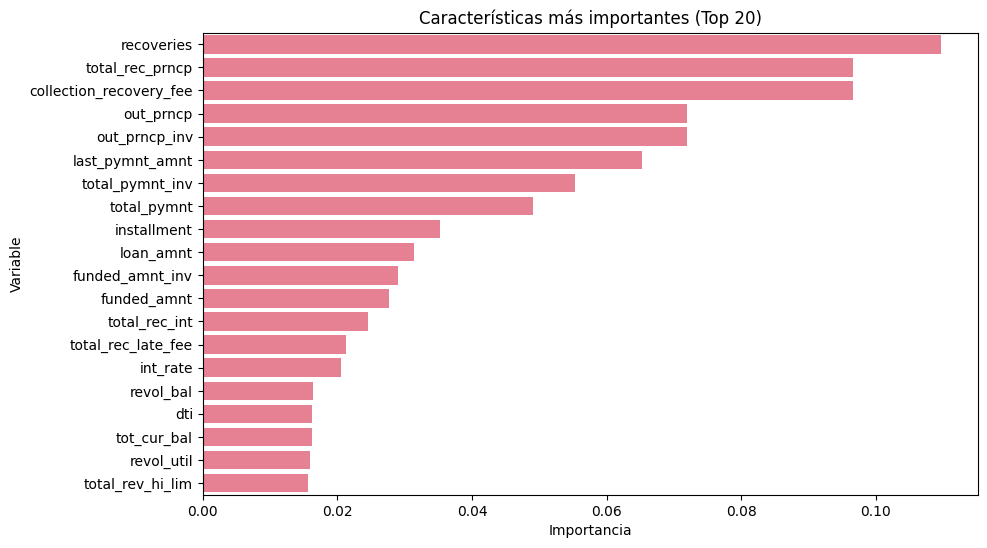

In [96]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Importancia', y='Variable', data=feature_importances.head(20))
plt.title('Características más importantes (Top 20)')
plt.show()

Las características con una alta importancia en la predicción de la variable target son:
* recoveries: Cargo posterior a la recuperación bruta
* total_rec_prncp: Principal recibido hasta la fecha
* collection_recovery_fee: Carga posterior a la tarifa de cobro
* out_prncp_inv: Principal pendiente restante para el monto total financiado por inversionistas
* last_pymnt_amnt: Último importe total del pago recibido
* total_pymnt_inv: Pagos recibidos hasta la fecha por parte del monto total financiado por los inversores
* out_prncp: Principal pendiente restante para el monto total financiado
* total_pymnt: Pagos recibidos hasta la fecha por parte del monto total financiado

Otras variables que también tienen una importancia media en la predicción son:
* installment: El pago mensual adeudado por el prestatario si se origina el préstamo
* funded_amnt: Cantidad comprometida al préstamo 
* funded_amnt_inv: Cantidad comprometida por los inversionistas para el préstamo
* loan_amnt: Cantidad del préstamo 
* total_rec_int: Intereses recibidos hasta la fecha
* total_rec_late_fee: Cargos por pagos atrasados recibidos hasta la fecha 